In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from Forcasting import graph, conversionSingle, rmsemape
from statsmodels.tsa.statespace.sarimax import SARIMAX

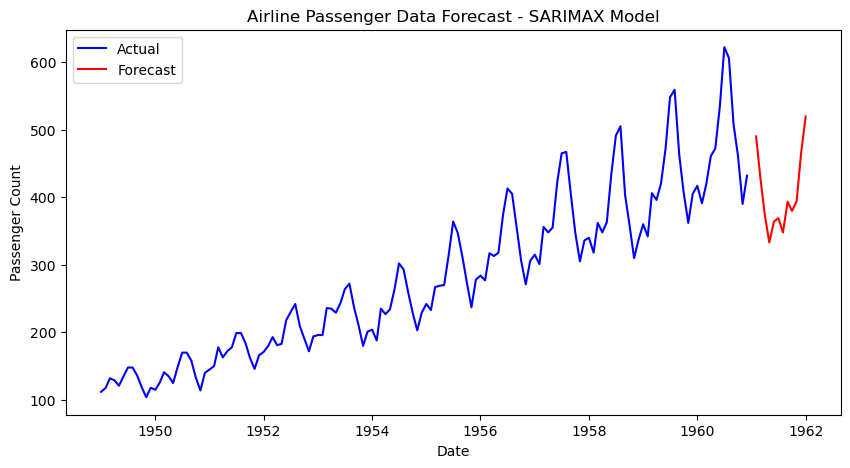

In [37]:
# Load data
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(data_url, parse_dates=['Month'], index_col='Month')
data = data.rename(columns={'Passengers': 'Passenger_Count'})

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Passenger_Count']])

# Split data into train and test sets
training_size = round(len(data_scaled) * 0.80)
X_train = data_scaled[:training_size]
X_test = data_scaled[training_size:]

# Define exogenous variables (dummy variable for this example)
exog_train = np.ones((len(X_train), 1))  # Example shape
exog_test = np.ones((len(X_test), 1))

# Fit SARIMAX model
p = 1  # AR term
d = 1  # Differencing term
q = 1  # MA term
P = 1  # Seasonal AR term
D = 1  # Seasonal differencing term
Q = 1  # Seasonal MA term
s = 12  # Seasonal period

model = SARIMAX(X_train, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exog_train)
model_fit = model.fit()

# Forecast future values
forecast_steps = 12  # Forecasting for 1 year

# Adjust forecast_exog to match the model's training exog
# Ensure the forecast_exog has the same number of columns and rows as needed by the model
forecast_exog = np.ones((forecast_steps, 1))  # Ensure the forecast exog has the right shape

# Perform forecasting
forecast = model_fit.get_forecast(steps=forecast_steps, exog=forecast_exog)
forecast_mean = forecast.predicted_mean

# Inverse transform forecast to original scale
forecast_passenger_count = scaler.inverse_transform(forecast_mean.reshape(-1, 1))
forecast_passenger_count_df = conversionSingle(forecast_passenger_count, ["Forecast"])
forecast_passenger_count_df.to_csv("AirlinePassengerForecast_SARIMAX.csv", index=False)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(data.index, scaler.inverse_transform(data_scaled), color='blue', label="Actual")
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast_passenger_count_df, color='red', label="Forecast")
plt.title("Airline Passenger Data Forecast - SARIMAX Model")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()

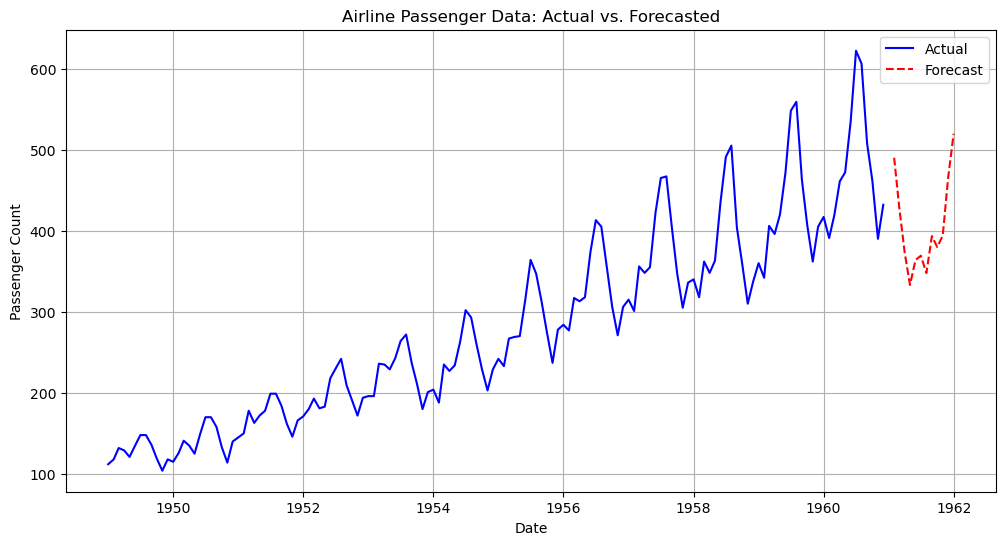

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define helper functions
def conversionSingle(data, columns):
    """
    Convert a 1D array-like data (numpy array) to a DataFrame with the specified column names.
    """
    return pd.DataFrame(data, columns=columns)

# Load data
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(data_url, parse_dates=['Month'], index_col='Month')
data = data.rename(columns={'Passengers': 'Passenger_Count'})

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Passenger_Count']])

# Split data into train and test sets
training_size = round(len(data_scaled) * 0.80)
X_train = data_scaled[:training_size]
X_test = data_scaled[training_size:]
test_index = data.index[training_size:]

# Define exogenous variables (dummy variable for this example)
exog_train = np.ones((len(X_train), 1))  # Example shape
exog_test = np.ones((len(X_test), 1))

# Fit SARIMAX model
p = 1  # AR term
d = 1  # Differencing term
q = 1  # MA term
P = 1  # Seasonal AR term
D = 1  # Seasonal differencing term
Q = 1  # Seasonal MA term
s = 12  # Seasonal period

model = SARIMAX(X_train, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exog_train)
model_fit = model.fit()

# Forecast future values
forecast_steps = 12  # Forecasting for 1 year
forecast_exog = np.ones((forecast_steps, 1))  # Ensure the forecast exog has the right shape
forecast = model_fit.get_forecast(steps=forecast_steps, exog=forecast_exog)
forecast_mean = forecast.predicted_mean

# Inverse transform forecast to original scale
forecast_passenger_count = scaler.inverse_transform(forecast_mean.reshape(-1, 1))
forecast_passenger_count_df = conversionSingle(forecast_passenger_count, ["Forecast"])
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(data_scaled), color='blue', label="Actual")
plt.plot(forecast_index, forecast_passenger_count_df, color='red', linestyle='--', label="Forecast")
plt.title("Airline Passenger Data: Actual vs. Forecasted")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid(True)
plt.show()
